In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

%matplotlib inline

In [3]:
wine = datasets.load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names) # convert breast cancer data to Dataframe
df["target"]=wine.target

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

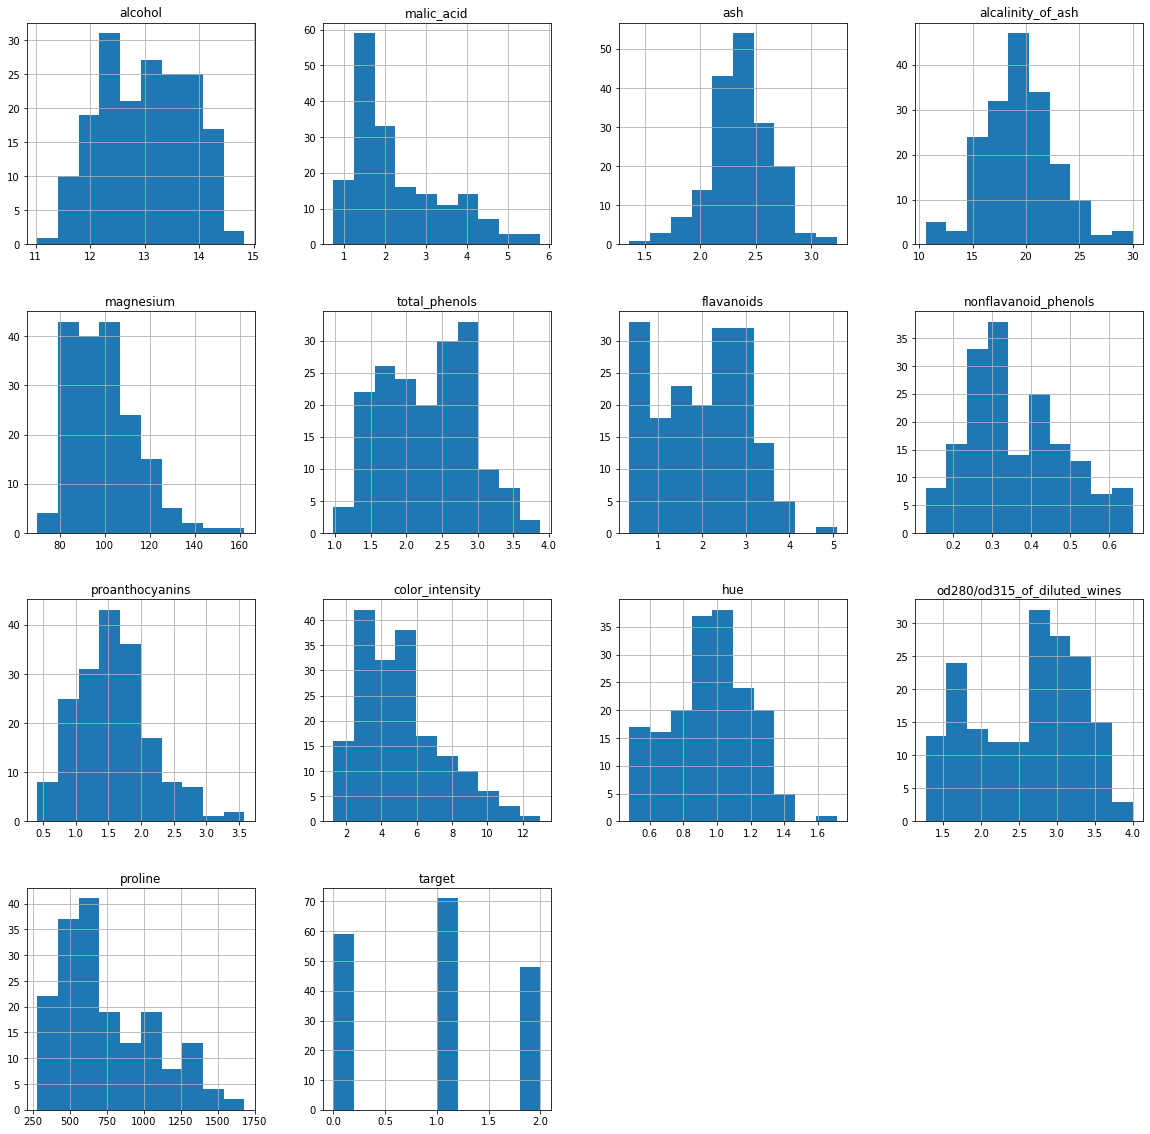

In [8]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

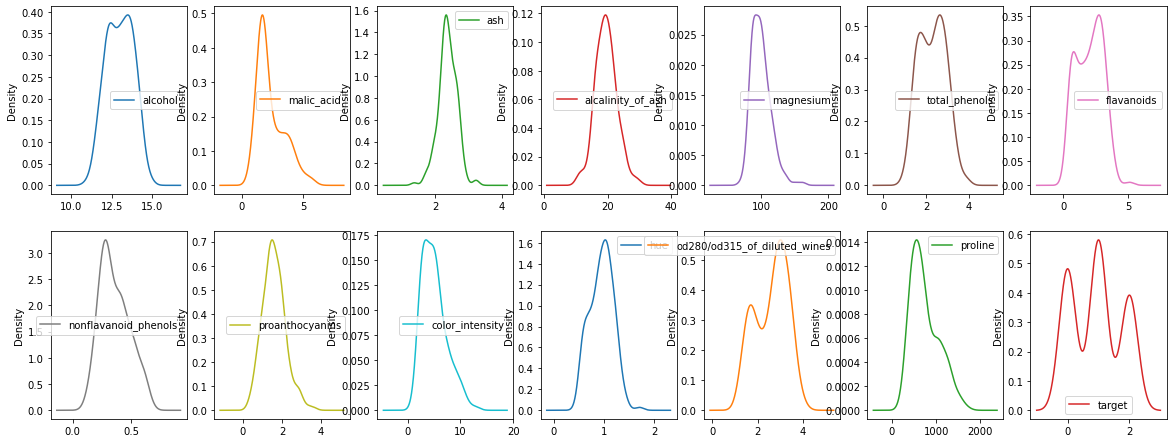

In [9]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [10]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [11]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [12]:
duplicate_values = df[df.duplicated()]
duplicate_values

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


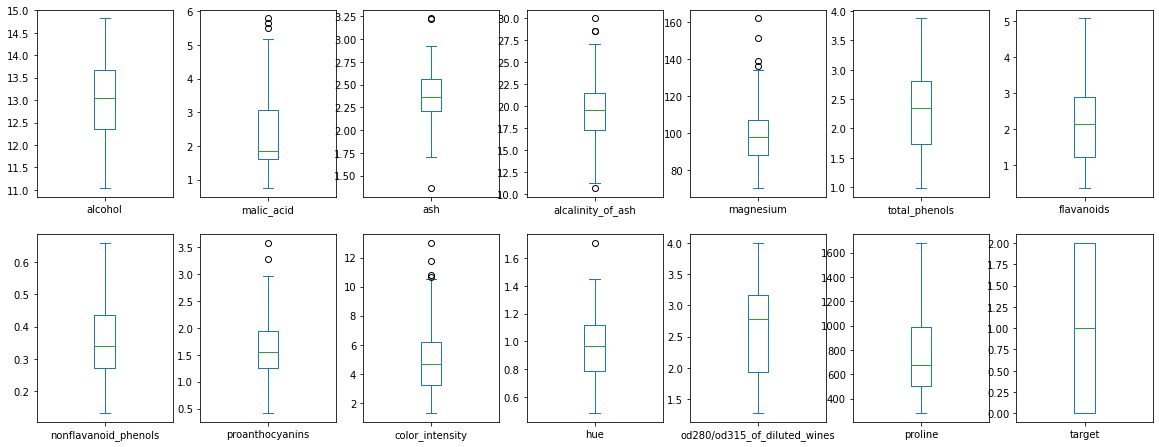

In [13]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [14]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'target').index
columns

Index(['target', 'alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid',
       'color_intensity'],
      dtype='object')

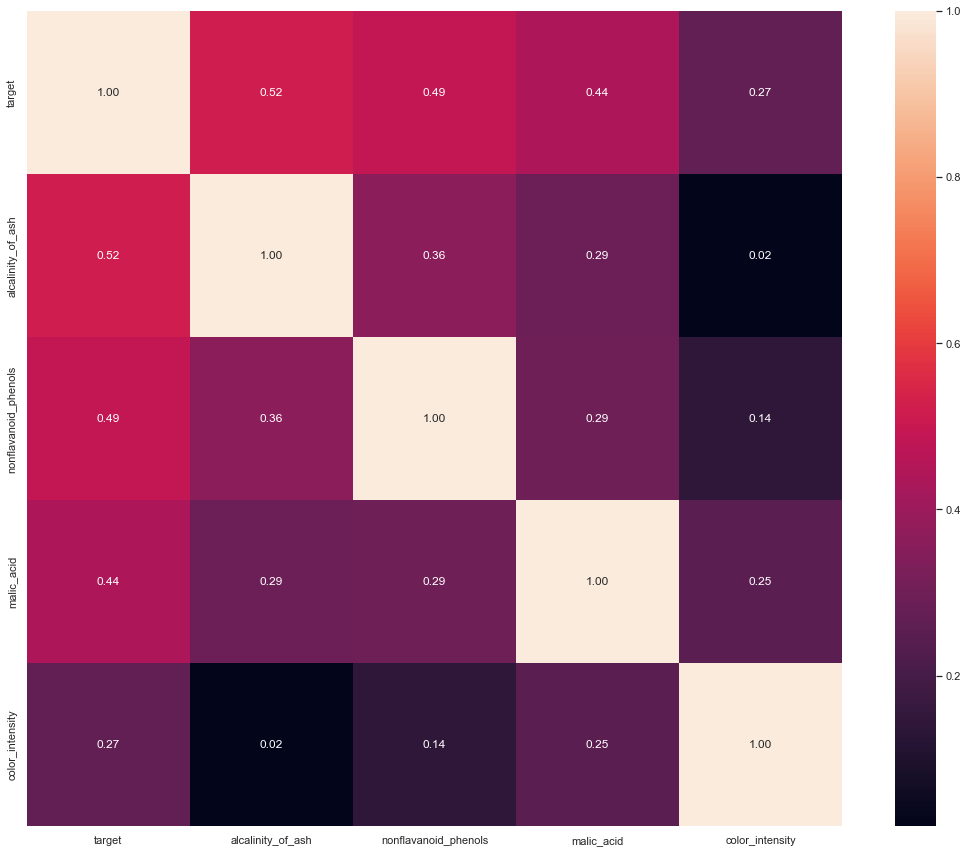

In [15]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [16]:
values = df.values

X = values[:,0:13]
Y = values[:,13]

##### Feature Scaling 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [18]:
df_scaled = pd.DataFrame(X_scaled)

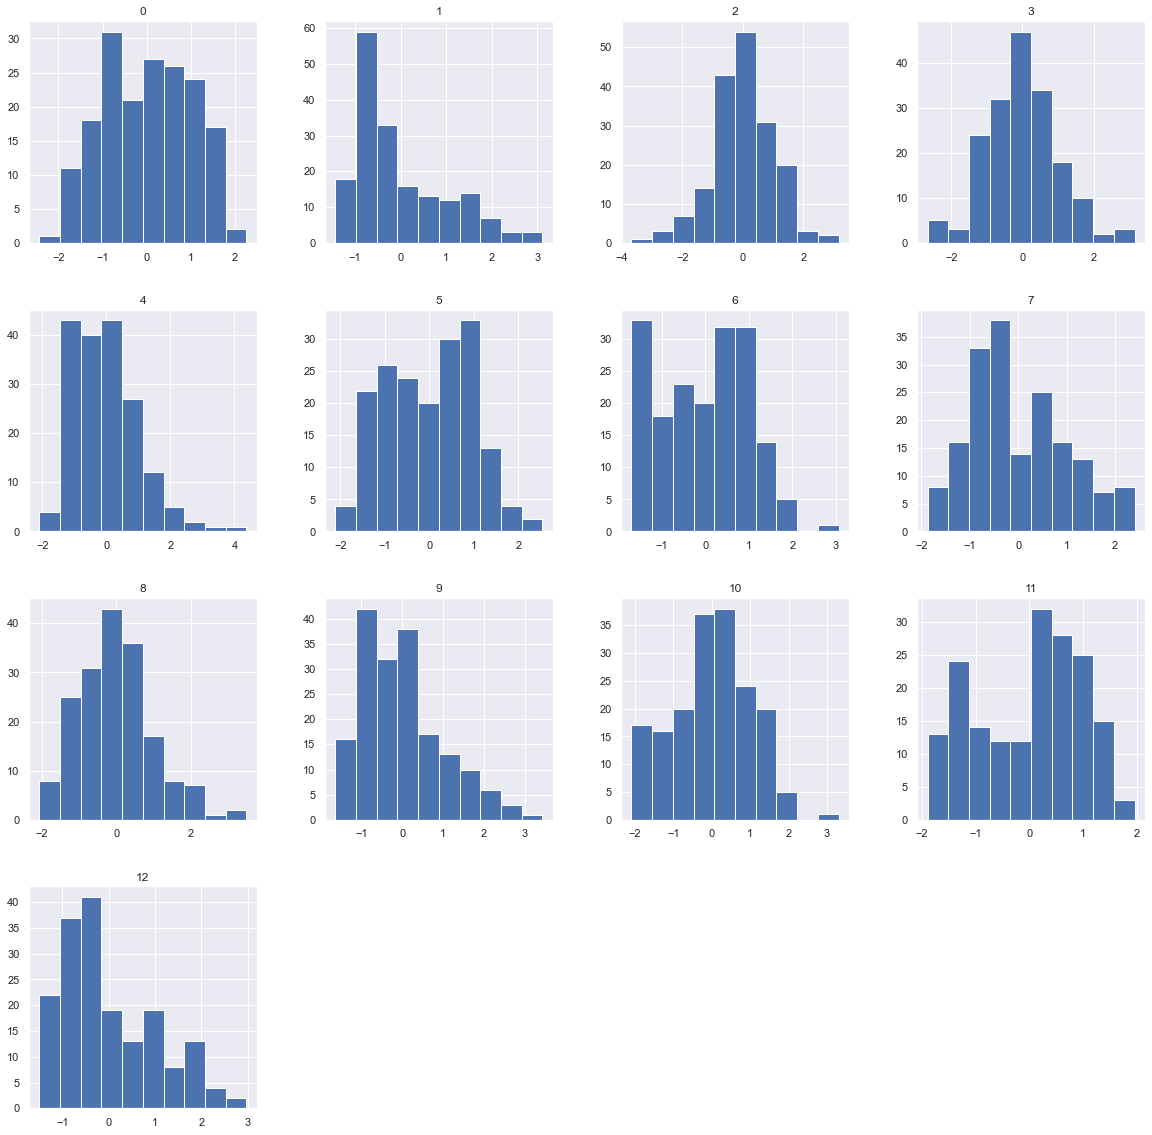

In [19]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results_no_noise={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_no_noise[i]=cv_results.mean()

 LR: 0.987958 (+/- 0.022741)
LDA: 0.989599 (+/- 0.022268)
kNN: 0.969720 (+/- 0.035930)
 DT: 0.899873 (+/- 0.075296)
 NB: 0.979032 (+/- 0.033058)
SVM: 0.960029 (+/- 0.034670)
 RF: 0.980110 (+/- 0.028827)
 GB: 0.942800 (+/- 0.051265)
XGB: 0.969199 (+/- 0.038694)
AdaBoost: 0.896567 (+/- 0.096544)
ANN: 0.981320 (+/- 0.029515)


In [21]:
# Multiple results from cross validation for statistical tests

In [22]:
# Create a function that assembles cross validation results  
def cv_res (results):  
    
    a = [5,10,15,20,25,30,35,40,45,50]

    x = []

    sum = 0

    for i , result in enumerate(results):
       
        sum += result

        if i+1 in a: 
            x.append(sum/5)
            sum=0
    return x

In [23]:
m =[]
for i in models:
    m.append(i[0])

f1_results = pd.DataFrame()


for i, m in enumerate(m):
    f1_results[str(m)] = cv_res(results[i])

f1_results    

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.989744,0.988811,0.957265,0.910857,0.989495,0.943662,0.989744,0.956690,0.977622,0.920919,0.965848
1,0.988811,0.986555,0.978555,0.873907,0.967273,0.975366,0.977622,0.919602,0.966511,0.935545,0.988811
2,0.988811,0.966703,0.967366,0.822537,0.967801,0.943471,0.977622,0.860221,0.932166,0.876102,0.988811
3,0.989744,1.000000,0.979239,0.939479,0.988811,0.956198,0.989744,0.966829,0.989744,0.911694,0.988148
4,0.978555,0.988148,0.957920,0.934195,0.978355,0.955563,0.978555,0.968099,0.978555,0.902627,0.977622
5,0.988811,0.988811,0.977208,0.919938,0.977008,0.964424,0.978306,0.964893,0.961639,0.874008,0.975613
6,0.989744,0.988811,0.947541,0.887116,0.988811,0.967366,0.966511,0.936253,0.956495,0.841084,0.988811
7,0.988148,0.988148,0.988148,0.953990,0.967138,0.962328,0.977643,0.967387,0.976027,0.935207,0.974180
8,0.989744,1.000000,0.989744,0.892014,0.989495,0.988811,0.989744,0.957437,0.977622,0.855036,0.989744
9,0.987464,1.000000,0.954216,0.864700,0.976135,0.943105,0.975613,0.930590,0.975613,0.913453,0.975613


In [24]:
f1_results_other_algorithms=f1_results.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_other_algorithms

0    0.966974
1    0.962301
2    0.941551
3    0.978794
4    0.969557
5    0.969665
6    0.961746
7    0.974314
8    0.976435
9    0.958305
dtype: float64

## Noise without noisify 

In [25]:
# Create a function to add noise    
def add_noise(X,p):
    if p>0:
        X_n = pd.DataFrame(X)
        a,b = X.shape
        c = round(a*p)

        for k in range(b):
            mean = X_n[k].mean()
            sd = X_n[k].std()

            for i in range(0,a,int(a/c)):
                X_n.iloc[i,k] = np.random.normal(mean,sd)

        return X_n.values

    else:
        return X

#### Add noise 5%

In [26]:
X2_noise1 = add_noise(X_scaled, p=0.05)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_1={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise1, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_1[i]=cv_results.mean()

 LR: 0.954864 (+/- 0.043533)
LDA: 0.958124 (+/- 0.043535)
kNN: 0.954183 (+/- 0.043661)
 DT: 0.852735 (+/- 0.087159)
 NB: 0.958222 (+/- 0.048119)
SVM: 0.938013 (+/- 0.049799)
 RF: 0.961458 (+/- 0.042546)
 GB: 0.925154 (+/- 0.058782)
XGB: 0.948194 (+/- 0.048760)
AdaBoost: 0.819641 (+/- 0.125618)
ANN: 0.958619 (+/- 0.037881)


In [28]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_1 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_1[str(m)] = cv_res(results[i])

f1_results_noise_1

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.976959,0.988811,0.967366,0.885290,0.979239,0.976959,0.968050,0.945750,0.968050,0.922074,0.966703
1,0.937942,0.923258,0.943178,0.782630,0.931133,0.915699,0.951383,0.877325,0.926939,0.807500,0.936898
2,0.976410,0.976410,0.955698,0.853234,0.955449,0.955245,0.955074,0.922218,0.943912,0.854250,0.977143
3,0.936589,0.950293,0.955783,0.839942,0.976959,0.923370,0.966040,0.919401,0.966040,0.800676,0.940798
4,0.954765,0.953370,0.946252,0.887696,0.957016,0.942230,0.955897,0.934330,0.955897,0.867334,0.965954
5,0.946474,0.946104,0.953297,0.848571,0.952751,0.908359,0.972586,0.914785,0.951510,0.774086,0.974180
6,0.942779,0.941269,0.934208,0.833434,0.954659,0.918526,0.966703,0.922287,0.943471,0.679237,0.954582
7,0.962328,0.975613,0.976296,0.927956,0.955842,0.962328,0.975613,0.953968,0.954045,0.902799,0.962328
8,0.949788,0.949836,0.966040,0.816829,0.966040,0.949104,0.939531,0.919324,0.942046,0.736779,0.942999
9,0.964607,0.976276,0.943711,0.851770,0.953127,0.928311,0.963704,0.942151,0.930030,0.851674,0.964607


In [29]:
f1_results_noise_1_other_algorithms=f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_1_other_algorithms

0    0.962318
1    0.912638
2    0.947079
3    0.937521
4    0.945341
5    0.936862
6    0.931192
7    0.960632
8    0.934154
9    0.941829
dtype: float64

#### Add noise 10%

In [30]:
X2_noise2 = add_noise(X_scaled,p=.1)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_2={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_2[i]=cv_results.mean()

 LR: 0.899993 (+/- 0.070838)
LDA: 0.896981 (+/- 0.077027)
kNN: 0.874191 (+/- 0.069436)
 DT: 0.779844 (+/- 0.107843)
 NB: 0.871113 (+/- 0.084922)
SVM: 0.879139 (+/- 0.080494)
 RF: 0.896076 (+/- 0.079908)
 GB: 0.873690 (+/- 0.082518)
XGB: 0.868593 (+/- 0.081835)
AdaBoost: 0.813808 (+/- 0.105769)
ANN: 0.888692 (+/- 0.069501)


In [32]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_2 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_2[str(m)] = cv_res(results[i])

f1_results_noise_2

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.921732,0.932082,0.897199,0.829456,0.924203,0.897844,0.924866,0.904130,0.890383,0.865778,0.909816
1,0.878572,0.843865,0.826885,0.719030,0.816071,0.856253,0.877932,0.836121,0.819977,0.803793,0.849526
2,0.873257,0.876194,0.878075,0.764081,0.869413,0.838989,0.889376,0.832770,0.853899,0.769763,0.878034
3,0.916703,0.901875,0.869200,0.777968,0.895870,0.927835,0.906766,0.876672,0.886624,0.867933,0.899916
4,0.912743,0.909635,0.891571,0.812615,0.881380,0.897224,0.913447,0.887720,0.888730,0.825031,0.910878
5,0.879346,0.898516,0.833147,0.787467,0.846323,0.846609,0.900111,0.890821,0.891041,0.769550,0.851660
6,0.862394,0.886569,0.864821,0.808024,0.845040,0.875326,0.877250,0.878276,0.888361,0.812274,0.887015
7,0.928761,0.904454,0.918355,0.849148,0.887944,0.905887,0.895579,0.869673,0.847802,0.823620,0.903119
8,0.917202,0.907252,0.886996,0.715487,0.855862,0.861252,0.875455,0.884473,0.864051,0.789922,0.885868
9,0.909225,0.909368,0.875661,0.735166,0.889027,0.884174,0.899979,0.876246,0.855060,0.810412,0.911090


In [33]:
f1_results_noise_2_other_algorithms=f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_2_other_algorithms

0    0.903171
1    0.832423
2    0.855409
3    0.885943
4    0.890594
5    0.862504
6    0.867308
7    0.891072
8    0.865390
9    0.874500
dtype: float64

#### Add noise 15%

In [34]:
X2_noise3 = add_noise(X_scaled,p=.15)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_3={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_3[i]=cv_results.mean()

 LR: 0.790492 (+/- 0.069202)
LDA: 0.801908 (+/- 0.068228)
kNN: 0.832540 (+/- 0.063741)
 DT: 0.738281 (+/- 0.102883)
 NB: 0.803339 (+/- 0.080625)
SVM: 0.808213 (+/- 0.080039)
 RF: 0.816000 (+/- 0.085124)
 GB: 0.807213 (+/- 0.085027)
XGB: 0.805888 (+/- 0.086074)
AdaBoost: 0.760231 (+/- 0.096640)
ANN: 0.792796 (+/- 0.072202)


In [36]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_3 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_3[str(m)] = cv_res(results[i])

f1_results_noise_3

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.822167,0.846739,0.846943,0.821234,0.869955,0.865498,0.867652,0.878292,0.880004,0.788550,0.829826
1,0.798851,0.797996,0.798261,0.754514,0.747568,0.810515,0.744459,0.738895,0.765035,0.744642,0.756493
2,0.787584,0.808343,0.847737,0.747242,0.794065,0.787334,0.820138,0.807848,0.808793,0.742909,0.789043
3,0.799317,0.813906,0.822303,0.719310,0.817377,0.808637,0.798211,0.836645,0.810370,0.771173,0.807557
4,0.793417,0.819716,0.847254,0.708202,0.794825,0.840444,0.838183,0.839971,0.792420,0.800372,0.807921
5,0.761472,0.751854,0.804086,0.687203,0.797557,0.729496,0.807003,0.773711,0.811231,0.690165,0.750531
6,0.710872,0.753424,0.798913,0.650678,0.735467,0.754685,0.770657,0.743894,0.729341,0.689702,0.753381
7,0.854316,0.854518,0.886836,0.806145,0.879239,0.867459,0.870392,0.881781,0.882865,0.814323,0.840396
8,0.804986,0.809468,0.827689,0.737676,0.778612,0.808736,0.791715,0.776154,0.770787,0.740651,0.817092
9,0.771938,0.763114,0.845380,0.750610,0.818728,0.809325,0.851592,0.794935,0.808036,0.819822,0.775717


In [37]:
f1_results_noise_3_other_algorithms=f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_3_other_algorithms

0    0.852831
1    0.771259
2    0.799813
3    0.803363
4    0.808235
5    0.767414
6    0.740131
7    0.862395
8    0.792292
9    0.798938
dtype: float64

#### Add noise 20%

In [38]:
X2_noise4 = add_noise(X_scaled,p=.2)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_4={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise4, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_4[i]=cv_results.mean()

 LR: 0.711373 (+/- 0.096474)
LDA: 0.709163 (+/- 0.104023)
kNN: 0.716257 (+/- 0.098409)
 DT: 0.677760 (+/- 0.137440)
 NB: 0.664473 (+/- 0.099267)
SVM: 0.712275 (+/- 0.105799)
 RF: 0.709441 (+/- 0.090608)
 GB: 0.681322 (+/- 0.103381)
XGB: 0.684050 (+/- 0.110017)
AdaBoost: 0.626505 (+/- 0.116566)
ANN: 0.692680 (+/- 0.094565)


In [40]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise_4 = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise_4[str(m)] = cv_res(results[i])

f1_results_noise_4

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.758236,0.757773,0.729754,0.763948,0.705603,0.756115,0.738867,0.717576,0.727071,0.636293,0.721703
1,0.693012,0.688994,0.709103,0.626381,0.627591,0.699530,0.691238,0.646736,0.655222,0.609786,0.651508
2,0.714023,0.734988,0.745132,0.627600,0.664946,0.716534,0.741321,0.724633,0.686190,0.633576,0.712122
3,0.681472,0.675672,0.665652,0.698674,0.647226,0.711696,0.716548,0.667499,0.678178,0.592793,0.674184
4,0.716691,0.726619,0.782259,0.627250,0.697578,0.697633,0.681992,0.687613,0.669327,0.677329,0.716893
5,0.701427,0.682367,0.643862,0.634337,0.610332,0.657736,0.660004,0.630500,0.663810,0.542446,0.635849
6,0.650376,0.639122,0.641201,0.646910,0.592371,0.644370,0.704250,0.614073,0.644454,0.629027,0.644255
7,0.779420,0.779420,0.800514,0.775139,0.749678,0.801694,0.767762,0.752462,0.737666,0.672269,0.793827
8,0.724532,0.699501,0.728645,0.742094,0.705092,0.743488,0.702872,0.704597,0.716558,0.642251,0.697783
9,0.694547,0.707174,0.716449,0.635265,0.644316,0.693950,0.689554,0.667537,0.662023,0.629281,0.678676


In [41]:
#f1_results_noise_4.mean().drop
f1_results_noise_4_other_algorithms=f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1)
f1_results_noise_4_other_algorithms

0    0.737665
1    0.668931
2    0.706749
3    0.681680
4    0.700385
5    0.652022
6    0.642138
7    0.773758
8    0.716516
9    0.678949
dtype: float64

In [42]:
f1_consolidated_results2 = pd.DataFrame()
f1_consolidated_results2 = f1_consolidated_results2.append(results_no_noise, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_1, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_2, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_3, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_4, ignore_index=True)

In [46]:
new_column_values = ['Without Noise','Noise 5%','Noise 10%','Noise 15%','Noise 20%']

f1_consolidated_results2 ["Status"] = new_column_values 

f1_consolidated_results2 

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN,Status
0,0.987958,0.989599,0.969720,0.899873,0.979032,0.960029,0.980110,0.942800,0.969199,0.896567,0.981320,Without Noise
1,0.954864,0.958124,0.954183,0.852735,0.958222,0.938013,0.961458,0.925154,0.948194,0.819641,0.958619,Noise 5%
2,0.899993,0.896981,0.874191,0.779844,0.871113,0.879139,0.896076,0.873690,0.868593,0.813808,0.888692,Noise 10%
3,0.790492,0.801908,0.832540,0.738281,0.803339,0.808213,0.816000,0.807213,0.805888,0.760231,0.792796,Noise 15%
4,0.711373,0.709163,0.716257,0.677760,0.664473,0.712275,0.709441,0.681322,0.684050,0.626505,0.692680,Noise 20%


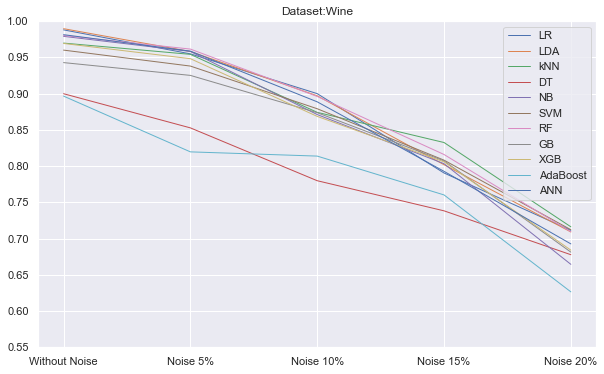

In [47]:
# Importing packages
import matplotlib.pyplot as plt

# Plot a simple line chart
fig, g = plt.subplots(figsize = (10,6))
plt.plot(f1_consolidated_results2 ['Status'],f1_consolidated_results2.drop(columns=['Status']),linewidth=1)
plt.legend(f1_consolidated_results2.columns,loc="upper right")
plt.ylim(0.55,1)
plt.fill_between(f1_consolidated_results2 ['Status'],f1_consolidated_results2.drop(columns=['Status']),color='k',alpha=.5)
plt.title("Dataset:Wine")
plt.show()

In [ ]:
sns.lineplot(data=f1_consolidated_results2)

### T-test Statistic 

In [50]:
from scipy.stats import ttest_ind as ttest

Hypothesis

H0: Noise does not effect the models efficiency f1_no_noise = f1_noise

H1: There is effect of noise in the models efficiency f1_no_noise <> f1_noise

#### T-test for data without noise

In [51]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is -6.293081
p-value for two tailed test is 0.000006
Since p-value(=0.000006) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### Cohen's d effect 

In [52]:
import math 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
# calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = math.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [53]:
cohend(f1_results['AdaBoost'].tolist(), f1_results_other_algorithms.tolist())

-2.814351219551123

### T-test for 5% noise

#### Compare with initial results

In [54]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_1['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 2.955919
p-value for two tailed test is 0.008457
Since p-value(=0.008457) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [55]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_1_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 4.382537
p-value for two tailed test is 0.000359
Since p-value(=0.000359) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 10% noise

#### Compare with initial results

In [ ]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_2['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


#### Compare with other algorithms

In [56]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_2_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 12.583739
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 15% noise

#### Compare with initial results

In [57]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_3['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 7.504181
p-value for two tailed test is 0.000001
Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [58]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_3_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 13.652929
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### T-test for 20% noise

#### Compare with initial results

In [59]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise_4['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 16.729253
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


#### Compare with other alforithms

In [60]:
t_value,p_value=ttest(f1_results_other_algorithms,f1_results_noise_4_other_algorithms)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 20.607799
p-value for two tailed test is 0.000000
Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


### Kolmogorov-Smirnov 

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

In [ ]:
# Hypothesis

# H0: Noise does not effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB = f1_noise_mean_of_the_rest

# H1:  Noise does effect the models efficiency of AdaBoost more than other algorithms f1_no_noise_AB <> f1_noise_mean_of_the_rest



### K-S for 5% noise

In [61]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_1['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_1.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.052448
Since p-value(=0.052448) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


In [62]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_1['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise1.drop(columns=['AdaBoost']).mean(axis=1))

0.07692646233681363

### K-S for 10% noise

In [64]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_2['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.417524
Since p-value(=0.417524) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


In [ ]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_2['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_2.drop(columns=['AdaBoost']).mean(axis=1))

### K-S for 15% noise

In [65]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_3['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)

p-value for two tailed KS test is 0.167821
Since p-value(=0.167821) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


In [ ]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_3['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_3.drop(columns=['AdaBoost']).mean(axis=1))

### K-S for 20% noise

In [66]:
from scipy.stats import ks_2samp  


#perform Kolmogorov-Smirnov test
t_value,p_value = ks_2samp(f1_results['AdaBoost']-f1_results_noise_4['AdaBoost'], f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1))


print('p-value for two tailed KS test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


p-value for two tailed KS test is 0.994458
Since p-value(=0.994458) > alpha(=0.05) We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at 0.05 level of significance.


In [ ]:
#np.mean(f1_results['AdaBoost']-f1_results_noise_4['AdaBoost'])
#np.mean(f1_results.drop(columns=['AdaBoost']).mean(axis=1)-f1_results_noise_4.drop(columns=['AdaBoost']).mean(axis=1))

#### Pearson correlation 

### Adaboost Table

In [67]:
#create table
d1 = {
    'AdaBoost_initial': f1_results['AdaBoost'],
    'AdaBoost_noise_1': f1_results_noise_1['AdaBoost'],
    'AdaBoost_noise_2': f1_results_noise_2['AdaBoost'],
    'AdaBoost_noise_3': f1_results_noise_3['AdaBoost'],
    'AdaBoost_noise_4': f1_results_noise_4['AdaBoost']
    }
Adaboost_table = pd.DataFrame(d1)
Adaboost_table

,AdaBoost_initial,AdaBoost_noise_1,AdaBoost_noise_2,AdaBoost_noise_3,AdaBoost_noise_4
0,0.920919,0.922074,0.865778,0.788550,0.636293
1,0.935545,0.807500,0.803793,0.744642,0.609786
2,0.876102,0.854250,0.769763,0.742909,0.633576
3,0.911694,0.800676,0.867933,0.771173,0.592793
4,0.902627,0.867334,0.825031,0.800372,0.677329
5,0.874008,0.774086,0.769550,0.690165,0.542446
6,0.841084,0.679237,0.812274,0.689702,0.629027
7,0.935207,0.902799,0.823620,0.814323,0.672269
8,0.855036,0.736779,0.789922,0.740651,0.642251
9,0.913453,0.851674,0.810412,0.819822,0.629281


In [ ]:
# Correlation between f1score of Adaboost and noise increase 

In [68]:
a = Adaboost_table.iloc[:,:1].squeeze()
     
b = Adaboost_table['AdaBoost_noise_1'].squeeze()

c = Adaboost_table['AdaBoost_noise_2'].squeeze()
  
d = Adaboost_table['AdaBoost_noise_3'].squeeze()    

e = Adaboost_table['AdaBoost_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)



noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)

df_cor = pd.concat([f1,noise], axis=1)

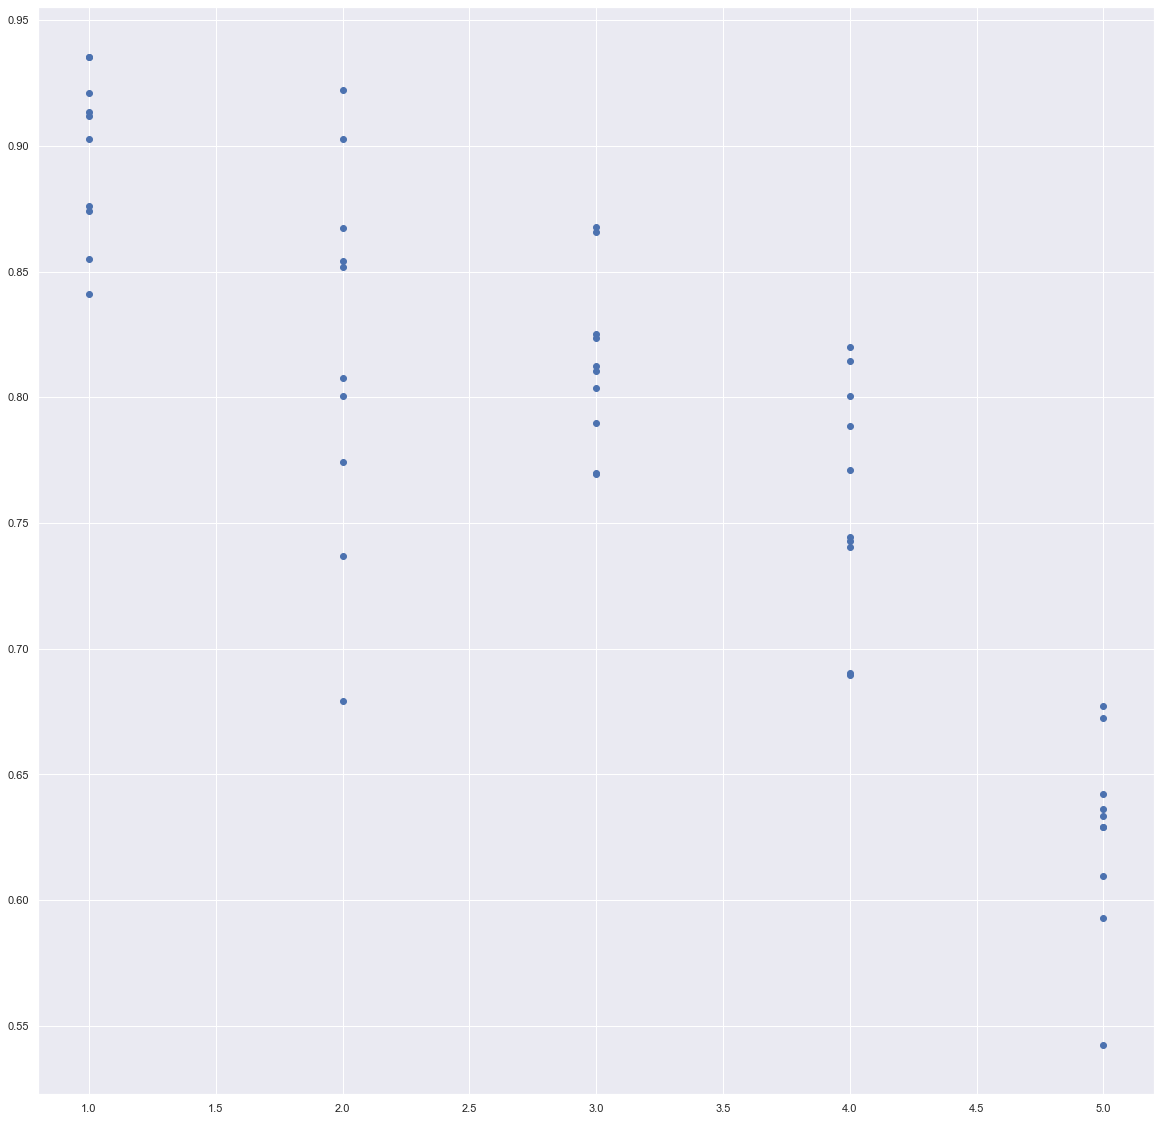

In [69]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [70]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.84 at 0.05 level of significance.
-0.8421999176938453


In [71]:
# Correlation between f1score of Other algorithms mean value and noise increase 

In [72]:
#create table
d2 = {
    'Other_Algorithms_initial': f1_results_other_algorithms,
    'Other_Algorithms_noise_1': f1_results_noise_1_other_algorithms,
    'Other_Algorithms_noise_2': f1_results_noise_2_other_algorithms,
    'Other_Algorithms_noise_3': f1_results_noise_3_other_algorithms,
    'Other_Algorithms_noise_4': f1_results_noise_4_other_algorithms
    }
Other_Algorithms_table = pd.DataFrame(d2)
Other_Algorithms_table

,Other_Algorithms_initial,Other_Algorithms_noise_1,Other_Algorithms_noise_2,Other_Algorithms_noise_3,Other_Algorithms_noise_4
0,0.966974,0.962318,0.903171,0.852831,0.737665
1,0.962301,0.912638,0.832423,0.771259,0.668931
2,0.941551,0.947079,0.855409,0.799813,0.706749
3,0.978794,0.937521,0.885943,0.803363,0.681680
4,0.969557,0.945341,0.890594,0.808235,0.700385
5,0.969665,0.936862,0.862504,0.767414,0.652022
6,0.961746,0.931192,0.867308,0.740131,0.642138
7,0.974314,0.960632,0.891072,0.862395,0.773758
8,0.976435,0.934154,0.865390,0.792292,0.716516
9,0.958305,0.941829,0.874500,0.798938,0.678949


In [73]:
a = Other_Algorithms_table.iloc[:,:1].squeeze()
     
b = Other_Algorithms_table['Other_Algorithms_noise_1'].squeeze()

c = Other_Algorithms_table['Other_Algorithms_noise_2'].squeeze()
  
d = Other_Algorithms_table['Other_Algorithms_noise_3'].squeeze()    

e = Other_Algorithms_table['Other_Algorithms_noise_4'].squeeze()

f1 = pd.concat([a,b,c,d,e])

f1 = pd.DataFrame(f1)

f1.rename(columns = {0:'f1'}, inplace = True)
f1.reset_index(drop=True, inplace=True)


noise_1 = [1 for i in range(10)]
noise_2 = [2 for i in range(10)]
noise_3 = [3 for i in range(10)]
noise_4 = [4 for i in range(10)]
noise_5 = [5 for i in range(10)]

noise = noise_1+noise_2+noise_3+noise_4+noise_5

noise = pd.DataFrame(noise)

noise.rename(columns = {0:'noise'}, inplace = True)
noise.reset_index(drop=True, inplace=True)


df_cor = pd.concat([f1,noise], axis=1)

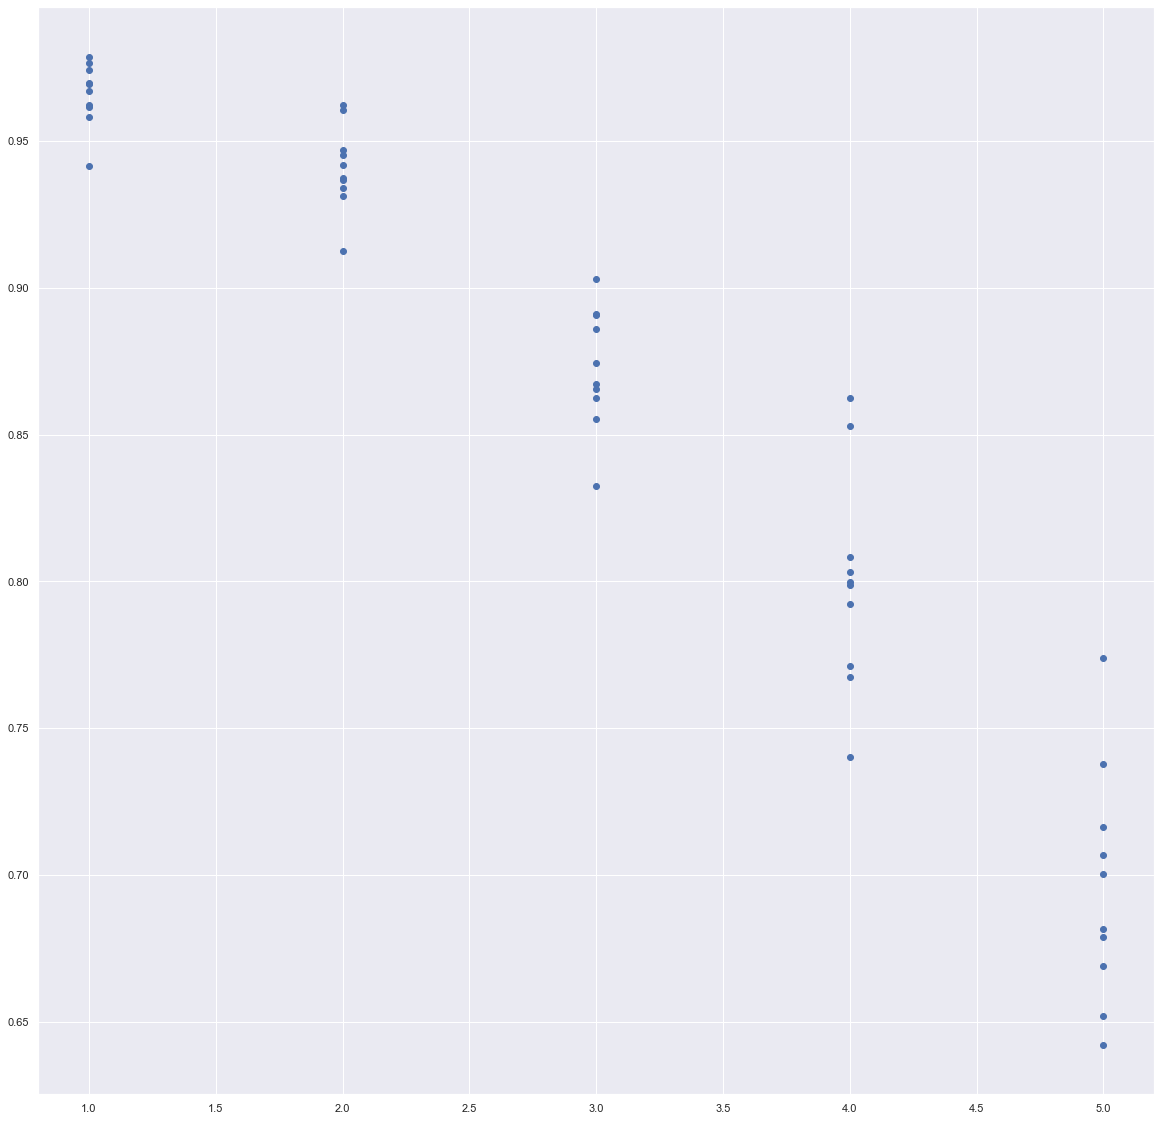

In [74]:
plt.scatter(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

In [75]:
from scipy.stats import pearsonr

# Returns Pearson’s correlation coefficient,2-tailed p-value)


# Hypothesis

# H0: ρ = 0

# H1: ρ <> 0


corr, p_value = pearsonr(df_cor.iloc[:,1].values.tolist(), df_cor.iloc[:,0].values.tolist())

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is correlation %.2f at %.2f level of significance.'''%(corr,alpha))

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that there is not correlation at %.2f level of significance.''' %alpha)
print(corr)

Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that there is correlation -0.95 at 0.05 level of significance.
-0.9472886083352902


Thus we can see from the effect size the of correlation that Adaboost is not more sensitive than other algorithms.